In [47]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
url = "http://stat.columbia.edu/~rachel/datasets/nyt1.csv"
data1 = pd.read_csv(url)

# 1. Create a new variable, age_group, that categorizes users as "<18",
#    "18-24", "25-34", "35-44", "45-54", "55-64", and "65+".
def get_age_group(column):
    if column == 0:
        return "0"
    elif column < 18:
        return "<18"
    elif column <= 24:
        return "18-24"
    elif column <= 34:
        return "25-34"
    elif column <= 44:
        return "35-44"
    elif column <= 54:
        return "45-54"
    elif column <= 64:
        return "55-64"
    else:
        return "65+"

data1['age_group'] = data1["Age"].apply(get_age_group)
data1_nsi = data1[data1["Age"] == 0]
data1 = data1[data1["Age"] != 0]

In [48]:
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


In [61]:
data1.describe()

,Age,Gender,Impressions,Clicks,Signed_In,ctr
count,321335.000000,321335.000000,321335.000000,321335.000000,321335.0,319198.000000
mean,42.062054,0.523644,5.010584,0.071480,1.0,0.014254
std,16.308117,0.499441,2.238784,0.268659,0.0,0.060280
min,7.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,29.000000,0.000000,3.000000,0.000000,1.0,0.000000
50%,41.000000,1.000000,5.000000,0.000000,1.0,0.000000
75%,53.000000,1.000000,6.000000,0.000000,1.0,0.000000
max,108.000000,1.000000,20.000000,3.000000,1.0,1.000000


In [62]:
data1_nsi.describe()

,Age,Gender,Impressions,Clicks,Signed_In,ctr
count,137106.0,137106.0,137106.000000,137106.00000,137106.0,136177.000000
mean,0.0,0.0,4.999657,0.14208,0.0,0.028355
std,0.0,0.0,2.240662,0.38551,0.0,0.085324
min,0.0,0.0,0.000000,0.00000,0.0,0.000000
25%,0.0,0.0,3.000000,0.00000,0.0,0.000000
50%,0.0,0.0,5.000000,0.00000,0.0,0.000000
75%,0.0,0.0,6.000000,0.00000,0.0,0.000000
max,0.0,0.0,18.000000,4.00000,0.0,1.000000


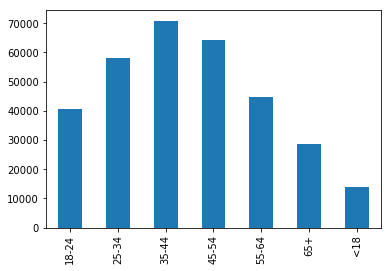

In [69]:
data1["age_group"].value_counts().sort_index().plot.bar()

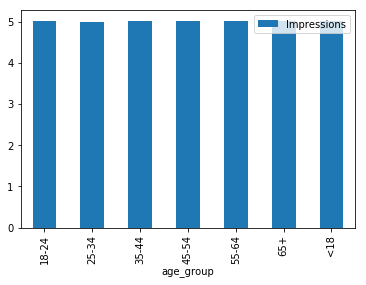

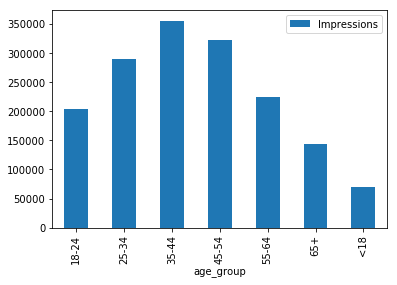

In [50]:
data1[["age_group","Impressions"]].groupby(by="age_group").agg(np.mean).plot.bar();
data1[["age_group","Impressions"]].groupby(by="age_group").agg(sum).plot.bar();

In [58]:
data1["ctr"] = data1["Clicks"]/data1["Impressions"]
data1_nsi["ctr"] = data1_nsi["Clicks"]/data1_nsi["Impressions"]
data1.tail()

,Age,Gender,Impressions,Clicks,Signed_In,age_group,ctr
458432,30,0,4,0,1,25-34,0.0
458433,21,1,2,0,1,18-24,0.0
458434,61,1,6,0,1,55-64,0.0
458435,51,0,7,0,1,45-54,0.0
458438,72,1,5,0,1,65+,0.0


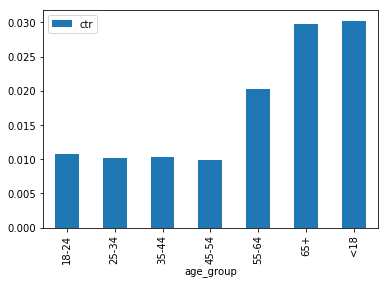

In [70]:
data1[["age_group","ctr"]].groupby(by="age_group").agg(np.mean).plot.bar();

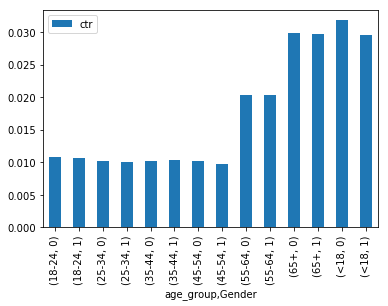

In [54]:
data1[["age_group","Gender","ctr"]].groupby(by=["age_group","Gender"]).agg(np.mean).plot.bar()

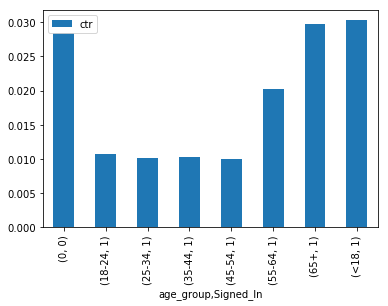

In [60]:
pd.concat([data1,data1_nsi])[["age_group","Signed_In","ctr"]].groupby(by=["age_group","Signed_In"]).agg(np.mean).plot.bar()

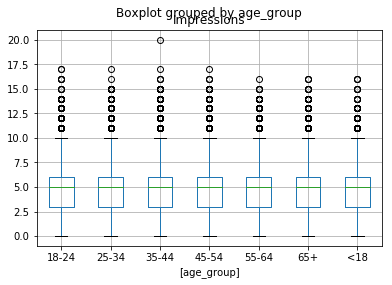

In [74]:
data1[["age_group","Impressions"]].boxplot(by="age_group")

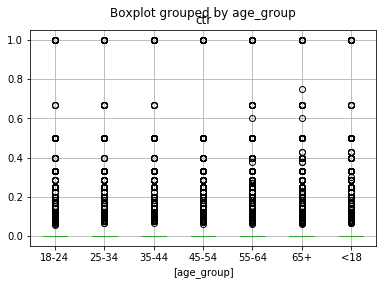

In [82]:
data1[["age_group","ctr"]].boxplot(by='age_group')